#### ML : Support Vector Machine

พัชรพล อ่วมโอฬาร 6210422018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns
sns.set(style="ticks")

In [3]:
def convert_stdZ(data, headers):
    df_std = StandardScaler().fit_transform(data)
    df_ret_std = pd.DataFrame(df_std, columns=headers)
    return df_ret_std

In [4]:
# IMPORT FROM LOCAL FILE (Downloaded form webSite)
pathStr = 'source'
filename = pathStr+'\wine.data'

In [5]:
col_name = ['CLASS','ALC','MLA','ASH','AOA','MAG','PHE','FLA','NFL','PRO','COL','HUE','ODW','PRL']

In [6]:
df_wine = pd.read_csv(filename, sep=',', lineterminator='\n', header=None, names=col_name)

In [7]:
df_wine.head(5)

,CLASS,ALC,MLA,ASH,AOA,MAG,PHE,FLA,NFL,PRO,COL,HUE,ODW,PRL
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )<br>
<ol>
    <li>ALC = Alcohol</li>
    <li>MLA = Malic acid</li>
    <li>ASH	= Ash</li>
    <li>AOA = Alcalinity of ash</li>
    <li>MAG = Magnesium</li>
    <li>PHE = Total phenols</li>
    <li>FLA = Flavanoids</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>PRO = Proanthocyanins</li>
    <li>COL = Color intensity</li>
    <li>HUE = Hue</li>
    <li>ODW = OD280/OD315 of diluted wines</li>
    <li>PRL = Proline</li>
</ol>

ทำ Correlation matrix

In [8]:
df_corr = pd.DataFrame(df_wine.corr())

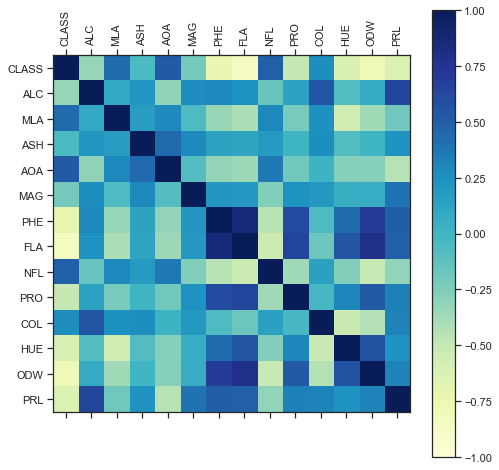

In [9]:
plt.figure(figsize=(8,8))
plt.matshow(df_corr,fignum=1)
plt.xticks(range(len(df_corr.columns)), labels=df_corr.columns, rotation='vertical')
plt.yticks(range(len(df_corr.columns)), labels=df_corr.columns)

plt.imshow(df_corr, cmap=plt.cm.get_cmap('YlGnBu', 360))
plt.colorbar()
plt.clim(-1, 1);
plt.show()

In [10]:
corr_cal = df_corr.iloc[0]

คัดเลือก Feature ที่เป็นบวกกับ CLASS

In [11]:
corr_cal

CLASS    1.000000
ALC     -0.328222
MLA      0.437776
ASH     -0.049643
AOA      0.517859
MAG     -0.209179
PHE     -0.719163
FLA     -0.847498
NFL      0.489109
PRO     -0.499130
COL      0.265668
HUE     -0.617369
ODW     -0.788230
PRL     -0.633717
Name: CLASS, dtype: float64

In [12]:
df_wine = df_wine[['CLASS','MLA','AOA','NFL','COL']]

Data preprocessing

In [13]:
target = df_wine[['CLASS']]

In [14]:
data = df_wine.drop('CLASS', axis=1)

In [15]:
cols = list(data.columns)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [17]:
X_Result = X_test.copy()

Standardize the data

In [18]:
X_train = convert_stdZ(X_train, cols)
X_test = convert_stdZ(X_test, cols)

#### Build model

Hyperparameter test

In [19]:
params = {
    'tol': [1e-3, 1e-2, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100, 1000]
}

In [20]:
svc = SVC()
clf = GridSearchCV(svc, params)

In [21]:
clf = clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [22]:
clf.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.5, verbose=False)

In [23]:
svc_model = SVC(C=0.1, kernel='linear', tol=0.5)

In [24]:
svc_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.5, verbose=False)

In [25]:
avg = svc_model.score(X_test, y_test, sample_weight=None)

In [26]:
print(f'Mean accuracy : {avg:.4f}')

Mean accuracy : 0.8333


#### Predict class

In [27]:
pred_elem = svc_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


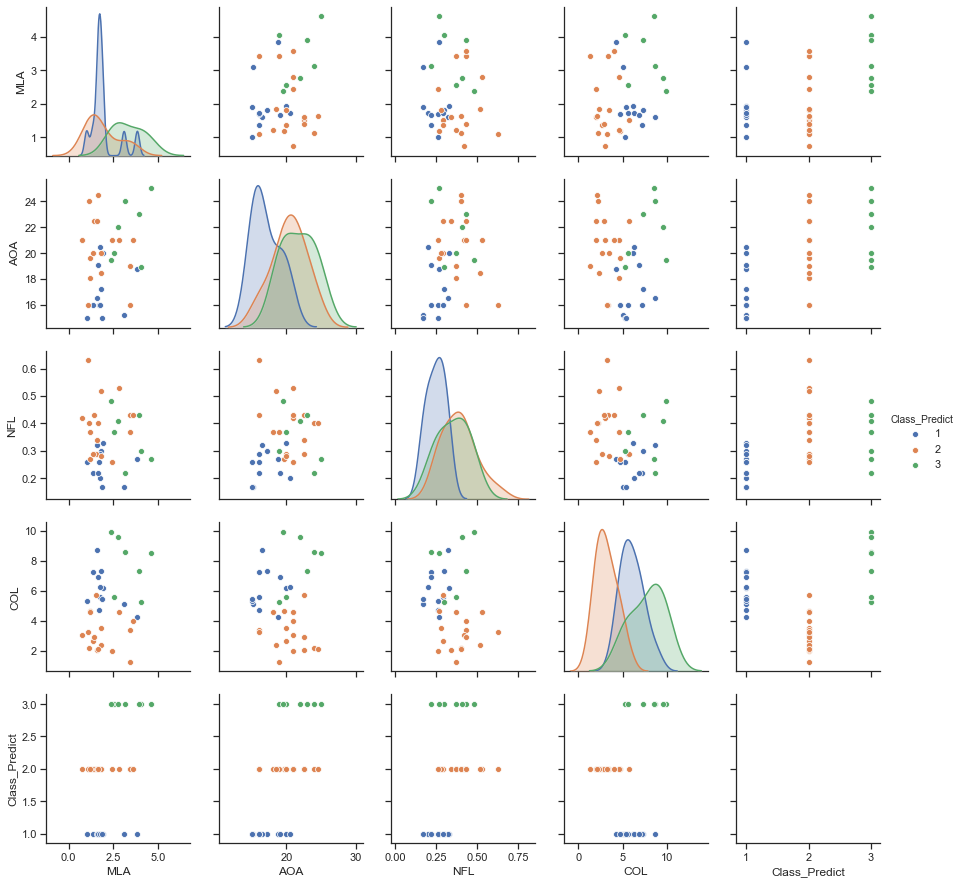

In [28]:
X_Result['Class_Predict'] = pred_elem
sns.pairplot(X_Result, hue="Class_Predict")

In [29]:
X_Result['Actual'] = y_test

In [30]:
X_Result.head(10)

,MLA,AOA,NFL,COL,Class_Predict,Actual
19,3.10,15.2,0.17,5.10,1,1
45,4.04,18.9,0.30,5.24,3,1
140,2.81,21.0,0.53,4.60,2,3
30,1.50,22.5,0.29,5.70,2,1
67,1.17,19.6,0.27,4.68,2,2
16,1.92,20.0,0.33,6.20,1,1
119,3.43,19.0,0.37,1.28,2,2
174,3.91,23.0,0.43,7.30,3,3
109,1.35,20.0,0.29,2.65,2,2
141,2.56,20.0,0.37,5.60,3,3
